### 국내 시가총액 상위10개종목의 2024년도 주가추이 비교하기

In [27]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [28]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 50)  # None으로 설정하면 모든 행 출력

In [29]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# matplotlib 한글지원 패키지
import koreanize_matplotlib

In [31]:
# FinanceDataReader import
import FinanceDataReader as fdr

In [32]:
fdr.__version__

'0.9.94'

#### 1) 종목정보가져오기

종목코드, 종목명, 시가총액 정보가져오기

In [33]:
df_stocks = pd.read_csv('stocks.csv')

In [34]:
df_stocks.shape

(2856, 23)

In [35]:
df_stocks.columns

Index(['Code', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode', 'Changes',
       'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount', 'Marcap',
       'Stocks', 'MarketId', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [36]:
# 국내 시가총액 상위10개종목의 코드
top10_codes = df_stocks.sort_values(by='Marcap', ascending=False).head(10)[['Code','Name']]

In [37]:
top10_codes.values

array([['005930', '삼성전자'],
       ['000660', 'SK하이닉스'],
       ['373220', 'LG에너지솔루션'],
       ['207940', '삼성바이오로직스'],
       ['005380', '현대차'],
       ['068270', '셀트리온'],
       ['000270', '기아'],
       ['005935', '삼성전자우'],
       ['035420', 'NAVER'],
       ['105560', 'KB금융']], dtype=object)

In [38]:
arr1, arr2 = top10_codes.values[:,0], top10_codes.values[:,1]

In [39]:
dict(zip(arr1,arr2))

{'005930': '삼성전자',
 '000660': 'SK하이닉스',
 '373220': 'LG에너지솔루션',
 '207940': '삼성바이오로직스',
 '005380': '현대차',
 '068270': '셀트리온',
 '000270': '기아',
 '005935': '삼성전자우',
 '035420': 'NAVER',
 '105560': 'KB금융'}

In [40]:
# 2차원배열 => 딕셔너리로 변환 
# case1)딕셔너리 컴프리핸션
# dict_top10_codes = { ele[0] : ele[1] for ele in top10_codes.values }
# case2) zip : iterable객체의 동일 인덱스에 있는 요소들을 묶어서 튜플로 반환
# dict_top10_codes = dict(zip(top10_codes.values[:,0],top10_codes.values[:,1]))
# case3) tolist : numpy의 ndarray를 파이썬의 list로 변환
dict_top10_codes = dict(top10_codes.values.tolist())
dict_top10_codes

{'005930': '삼성전자',
 '000660': 'SK하이닉스',
 '373220': 'LG에너지솔루션',
 '207940': '삼성바이오로직스',
 '005380': '현대차',
 '068270': '셀트리온',
 '000270': '기아',
 '005935': '삼성전자우',
 '035420': 'NAVER',
 '105560': 'KB금융'}

#### 2) 종목 시세 가져오기

In [41]:
# fdr.DataReader('005930','2024')

시가총액 상위 10개종목 이름을 키로 종가추이를 값으로 하는 딕셔너리 생성

In [42]:
item_dict = {}
for key, value in dict_top10_codes.items() :
    item_dict[value] = fdr.DataReader(key,'2024')['Close']
    
len(item_dict)    

10

In [150]:
item_dict['NAVER']

Date
2024-01-02    227500
2024-01-03    222000
2024-01-04    223000
2024-01-05    220500
2024-01-08    226500
               ...  
2024-12-04    202500
2024-12-05    204000
2024-12-06    204500
2024-12-09    201500
2024-12-10    209000
Name: Close, Length: 231, dtype: int64

#### 3) 종목 종가 병합하기

딕셔너리를 데이터 프레임으로 변환

In [151]:
# case1)
df = pd.DataFrame(item_dict)
df

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,삼성전자우,KB금융,NAVER
Date,,,,,,,,,,
2024-01-02,79600,142400,429500,789000,200500,231500,97600,63000,53600,227500
2024-01-03,77000,136800,416000,787000,193800,231500,93800,61200,52600,222000
2024-01-04,76600,136400,419000,770000,190000,218000,92900,61700,51700,223000
2024-01-05,76600,137500,416000,756000,187300,214500,91600,61700,51300,220500
2024-01-08,76500,136000,415000,749000,185700,206000,88900,61800,52200,226500
...,...,...,...,...,...,...,...,...,...,...
2024-12-04,53100,168000,389000,961000,209000,183000,98100,45350,95400,202500
2024-12-05,53700,173000,382000,964000,204500,181000,94000,45550,85800,204000
2024-12-06,54100,167100,390500,962000,203500,180100,94800,45500,85300,204500


In [43]:
# case2)
# 종목의 종가를 열축으로 병합하기
df = pd.concat(item_dict.values(),axis=1)
# 컬럼명 수정
df = df.set_axis(dict_top10_codes.values(),axis=1)
df

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,삼성전자우,NAVER,KB금융
Date,,,,,,,,,,
2024-01-02,79600,142400,429500,789000,200500,231500,97600,63000,227500,53600
2024-01-03,77000,136800,416000,787000,193800,231500,93800,61200,222000,52600
2024-01-04,76600,136400,419000,770000,190000,218000,92900,61700,223000,51700
2024-01-05,76600,137500,416000,756000,187300,214500,91600,61700,220500,51300
2024-01-08,76500,136000,415000,749000,185700,206000,88900,61800,226500,52200
...,...,...,...,...,...,...,...,...,...,...
2024-12-05,53700,173000,382000,964000,204500,181000,94000,45550,204000,85800
2024-12-06,54100,167100,390500,962000,203500,180100,94800,45500,204500,85300
2024-12-09,53400,168900,387500,953000,201000,175100,92000,44800,201500,82800


#### 4) 종목의 시세 추이분석(line차트)

In [ ]:
df.plot?

<Axes: xlabel='Date'>

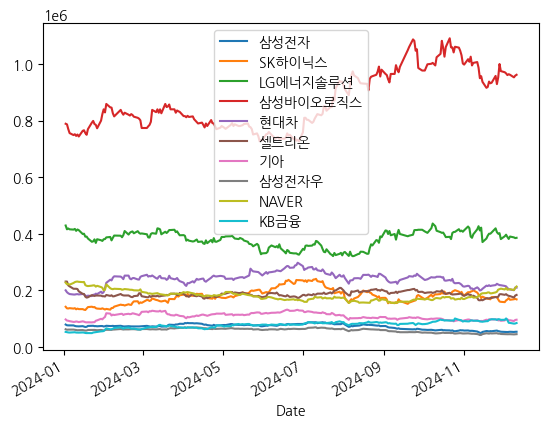

In [45]:
df.plot()

<Axes: xlabel='Date'>

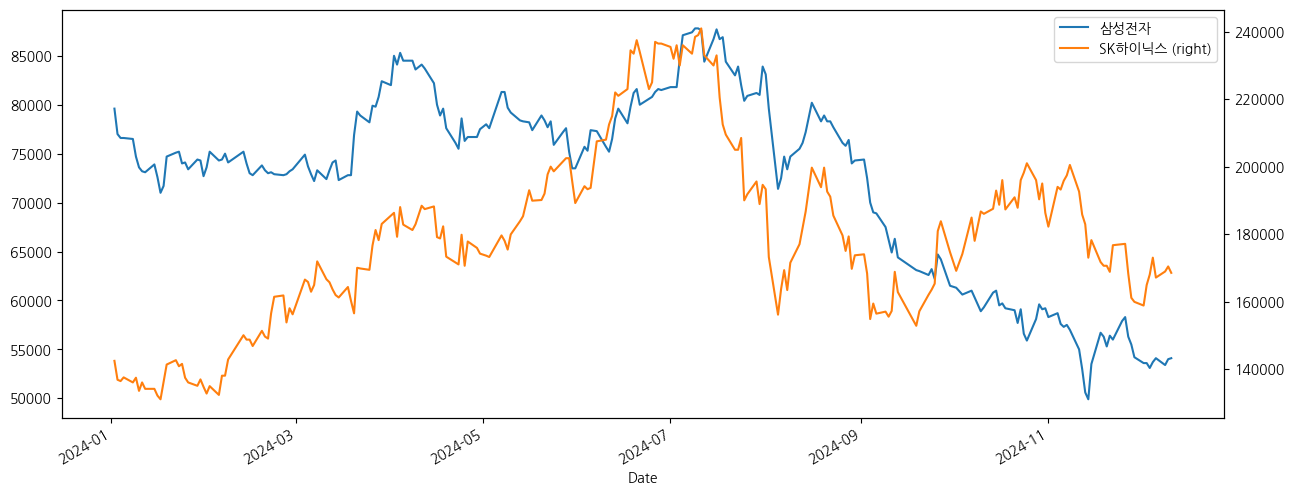

In [50]:
# 2개의 y축 그래프
df[['삼성전자','SK하이닉스']].plot(kind='line',figsize=(15,6), secondary_y ='SK하이닉스')

<Axes: xlabel='Date'>

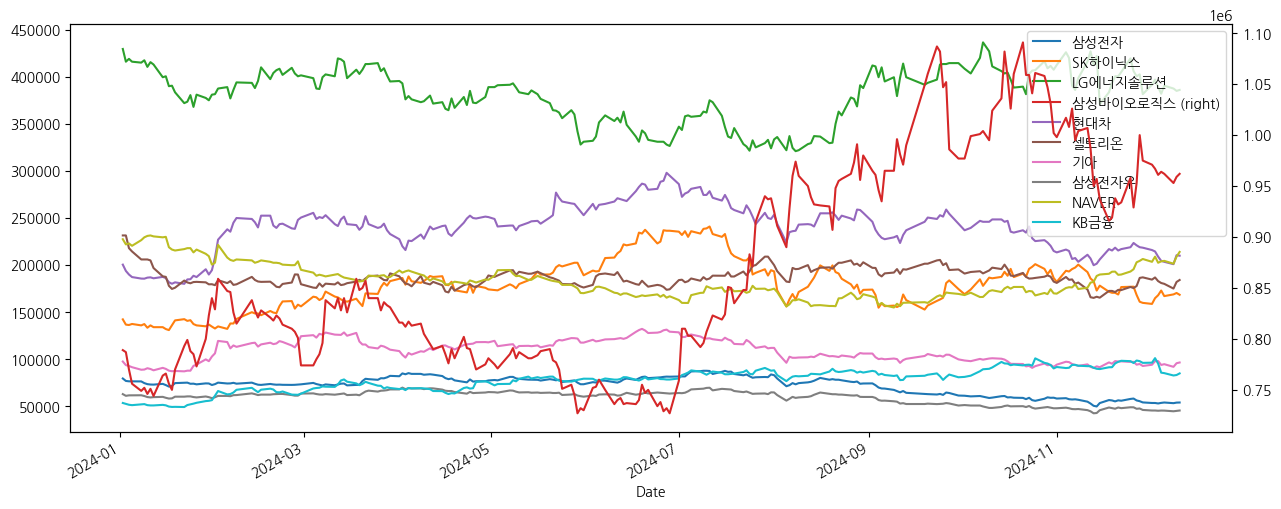

In [49]:
df.plot(figsize=(15,6), secondary_y ='삼성바이오로직스')

### 국내 시가총액 상위10개종목의 2024년도 수익률 비교하기

In [53]:
df[['삼성전자']]

,삼성전자
Date,
2024-01-02,79600
2024-01-03,77000
2024-01-04,76600
2024-01-05,76600
2024-01-08,76500
...,...
2024-12-05,53700
2024-12-06,54100
2024-12-09,53400


In [55]:
# 일짜별 수익율 추이
# 수익율 계산식 : 일짜별 종가 / 수익율계산 시작일 - 1
df['삼성전자'] / df['삼성전자'].iloc[0] - 1

Date
2024-01-02    0.000000
2024-01-03   -0.032663
2024-01-04   -0.037688
2024-01-05   -0.037688
2024-01-08   -0.038945
                ...   
2024-12-05   -0.325377
2024-12-06   -0.320352
2024-12-09   -0.329146
2024-12-10   -0.321608
2024-12-11   -0.320352
Name: 삼성전자, Length: 232, dtype: float64

In [56]:
# 시총 상위 10개종목의 2024년도 일자별 수익율
df/ df.iloc[0] - 1

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,삼성전자우,NAVER,KB금융
Date,,,,,,,,,,
2024-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-01-03,-0.032663,-0.039326,-0.031432,-0.002535,-0.033416,0.000000,-0.038934,-0.028571,-0.024176,-0.018657
2024-01-04,-0.037688,-0.042135,-0.024447,-0.024081,-0.052369,-0.058315,-0.048156,-0.020635,-0.019780,-0.035448
2024-01-05,-0.037688,-0.034410,-0.031432,-0.041825,-0.065835,-0.073434,-0.061475,-0.020635,-0.030769,-0.042910
2024-01-08,-0.038945,-0.044944,-0.033760,-0.050697,-0.073815,-0.110151,-0.089139,-0.019048,-0.004396,-0.026119
...,...,...,...,...,...,...,...,...,...,...
2024-12-05,-0.325377,0.214888,-0.110594,0.221800,0.019950,-0.218143,-0.036885,-0.276984,-0.103297,0.600746
2024-12-06,-0.320352,0.173455,-0.090803,0.219265,0.014963,-0.222030,-0.028689,-0.277778,-0.101099,0.591418
2024-12-09,-0.329146,0.186096,-0.097788,0.207858,0.002494,-0.243629,-0.057377,-0.288889,-0.114286,0.544776


In [58]:
# 2024.1.2 ~현재까지의 시총 상위종목 10개의 수익율 계산
((df/ df.iloc[0] - 1).iloc[-1].sort_values(ascending=False)*100).round(2)

KB금융        58.58
삼성바이오로직스    21.93
SK하이닉스      18.33
현대차          4.74
기아          -1.02
NAVER       -5.93
LG에너지솔루션   -10.13
셀트리온       -20.43
삼성전자우      -27.62
삼성전자       -32.04
Name: 2024-12-11 00:00:00, dtype: float64

In [59]:
tmp = (df / df.iloc[0] - 1).iloc[-1].sort_values(ascending=False)

In [60]:
tmp.map(lambda x : f'{(x * 100) : .2f}%')

KB금융         58.58%
삼성바이오로직스     21.93%
SK하이닉스       18.33%
현대차           4.74%
기아           -1.02%
NAVER        -5.93%
LG에너지솔루션    -10.13%
셀트리온        -20.43%
삼성전자우       -27.62%
삼성전자        -32.04%
Name: 2024-12-11 00:00:00, dtype: object

종목, 매수일, 매도일 => 수익율,수익금액

In [63]:
# 시총 상위 10개종목의 2024년도 일자별 수익율
tmp = df/ df.iloc[0] - 1
tmp

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,삼성전자우,NAVER,KB금융
Date,,,,,,,,,,
2024-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-01-03,-0.032663,-0.039326,-0.031432,-0.002535,-0.033416,0.000000,-0.038934,-0.028571,-0.024176,-0.018657
2024-01-04,-0.037688,-0.042135,-0.024447,-0.024081,-0.052369,-0.058315,-0.048156,-0.020635,-0.019780,-0.035448
2024-01-05,-0.037688,-0.034410,-0.031432,-0.041825,-0.065835,-0.073434,-0.061475,-0.020635,-0.030769,-0.042910
2024-01-08,-0.038945,-0.044944,-0.033760,-0.050697,-0.073815,-0.110151,-0.089139,-0.019048,-0.004396,-0.026119
...,...,...,...,...,...,...,...,...,...,...
2024-12-05,-0.325377,0.214888,-0.110594,0.221800,0.019950,-0.218143,-0.036885,-0.276984,-0.103297,0.600746
2024-12-06,-0.320352,0.173455,-0.090803,0.219265,0.014963,-0.222030,-0.028689,-0.277778,-0.101099,0.591418
2024-12-09,-0.329146,0.186096,-0.097788,0.207858,0.002494,-0.243629,-0.057377,-0.288889,-0.114286,0.544776


<Axes: xlabel='Date'>

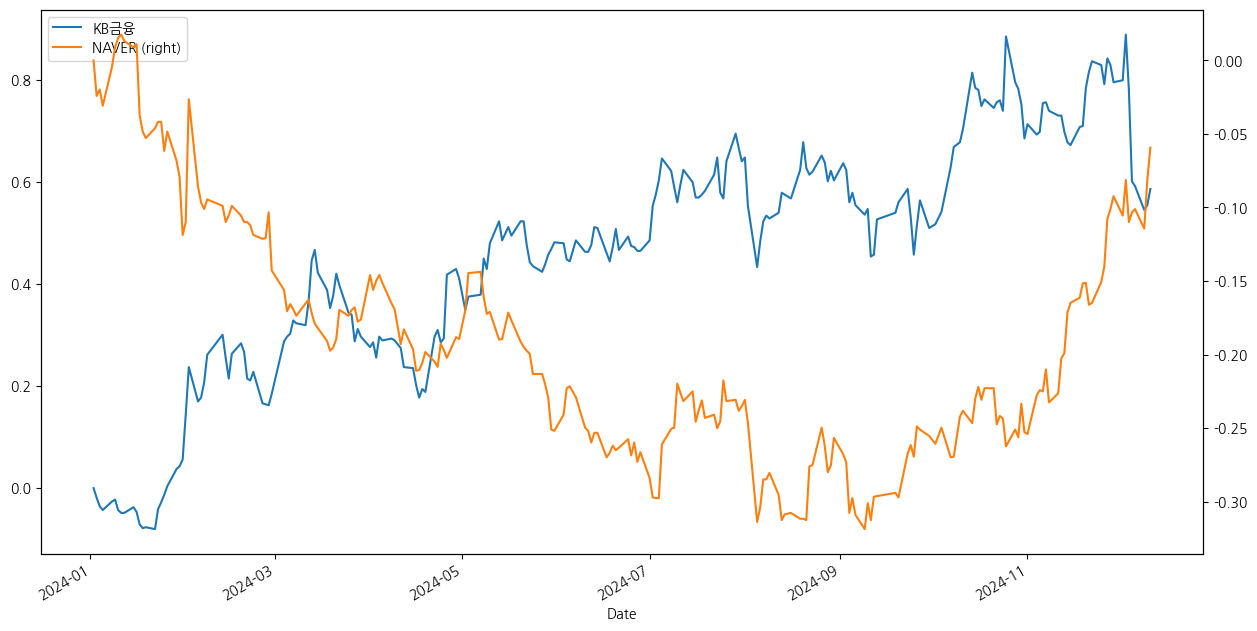

In [64]:
# 'KB금융','NAVER' 의 수익률 비교
tmp[['KB금융','NAVER']].plot(figsize=(15,8), secondary_y='NAVER')

<Axes: xlabel='Date'>

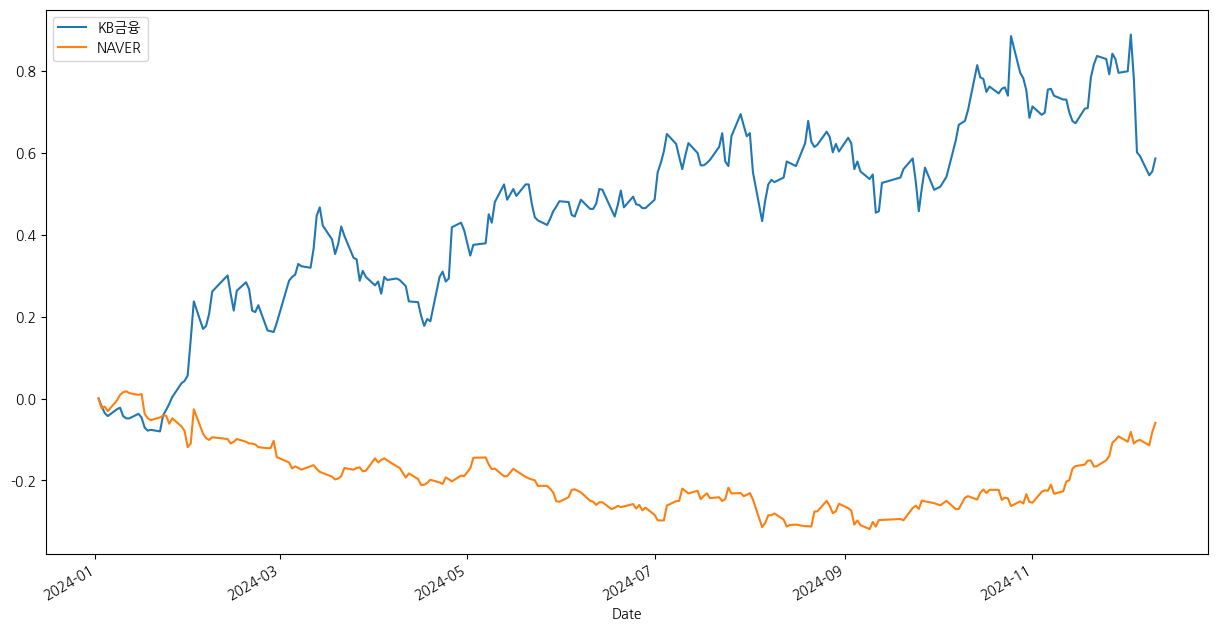

In [65]:
tmp[['KB금융','NAVER']].plot(figsize=(15,8))

<Axes: xlabel='Date'>

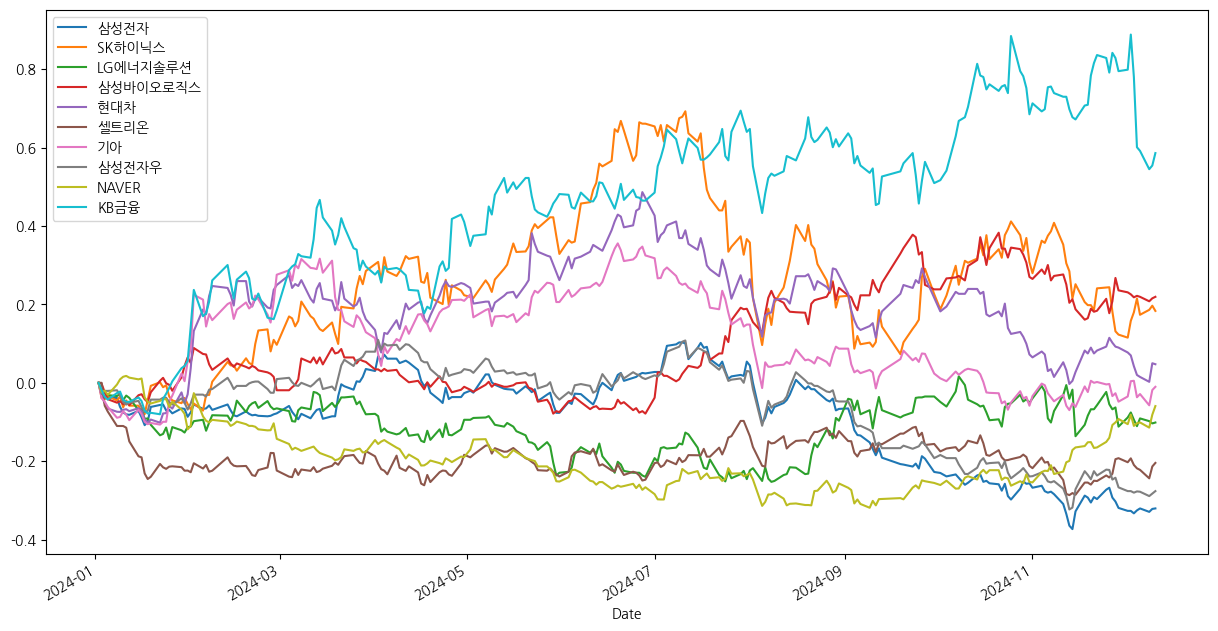

In [66]:
tmp.plot(figsize=(15,8))